In [2]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def sample_end_price(S0, local_vol_f, duration, n_intervals, n_samples):
    """
    Draw samples from the end price of an asset diffusion.
    
    Inputs
    ------
    S0 : float
        The initial spot price of the underlying at time t=0
        
    local_vol_f : float -> float (vectorized)
        The local volatility at a given spot price (assumed constant over time)
        
    duration : float
        The time to expiry, i.e. T.
    
    n_intervals : float
        Number of intervals into which to break up the numerical simulation
    
    n_samples : int
        Number of simulations to run
        
    Output
    -----
    S : NumPy float vector of length n_samples
        The ending spot prices of the asset diffusion for each simulation
    """
    dt = duration / n_intervals
    S = S0
    Z = np.sqrt(dt) * np.random.randn(n_samples, n_intervals)
    for i in (range(n_intervals)):
        #time = i / duration
        local_vols = local_vol_f(S) # , time)
#         growth_factor = np.exp(local_vols * np.random.randn(n_samples) * scaling_factor
#                               - dt * local_vols**2/2)
        S = S +  S * local_vols * Z[:, i] # np.random.randn(n_samples)
    return S

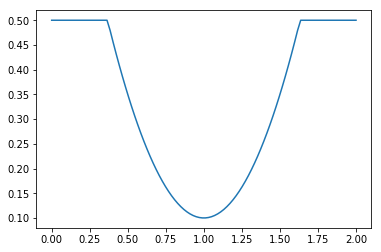

In [4]:
S0 = 1
K = 1.1
local_vol_f = lambda px :  np.clip(0.1 + (px-1)**2, 0, .5)
T = 1
n_samples = int(1e6)
# n_intervals = int(1e3)
plt.plot(np.linspace(0,2,100), local_vol_f(np.linspace(0,2,100)))

In [5]:
accur = sample_end_price(S0, local_vol_f, T, 200, n_samples)

In [6]:
p = accur[accur >= K].sum()/len(accur)

In [460]:
p

0.17719359302825333

In [7]:
dts = []
trials = []
for n_intervals in tqdm(range(1,41)):
    # n_intervals = int(np.exp(logn))
    dts.append(T/n_intervals)
    sample = sample_end_price(S0, local_vol_f, T, n_intervals, n_samples)
    trials.append(sample[sample >= K].sum()/len(sample));

A Jupyter Widget

In [8]:
import seaborn as sns

In [426]:
p

0.20328529542867585

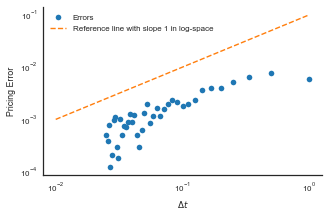

In [12]:
sns.set_style('white')
sns.set_context('paper')
plt.figure(figsize=(5,5/1.618))
plt.plot(dts, np.abs(np.array(trials)-p), 'o', label='Errors')
plt.plot(np.array([1e-2, 1e0]), np.array([1e-4, 1e-2]) * 10,'--', label='Reference line with slope 1 in log-space')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta t$');
plt.ylabel('Pricing Error');
plt.legend();
sns.despine()
plt.savefig('report/figs/montecarlo_discrete.eps')

In [423]:
np.array(trials)

array([ 0.21237069,  0.21386653,  0.21197684,  0.21028285,  0.20907453,
        0.20897672,  0.20836207,  0.20720546,  0.20778648,  0.20678499,
        0.20703096,  0.2063565 ,  0.20625512,  0.20559247,  0.20630843,
        0.20628071,  0.20564321,  0.20613252,  0.20552038,  0.20574489,
        0.20614688,  0.20602304,  0.20523183,  0.20534284,  0.20586758,
        0.20606518,  0.20488459,  0.20585423,  0.20600833,  0.20547136,
        0.20534554,  0.20446891,  0.20541221,  0.20499206,  0.20452453,
        0.20524416,  0.20509342,  0.20520035,  0.20518928,  0.20518841,
        0.20495452,  0.20394874,  0.20496454,  0.20491256,  0.20520739,
        0.20504088,  0.20472318,  0.20480848,  0.2050446 ,  0.20521906])

In [370]:
import pandas as pd
import statsmodels.formula.api as smf

In [442]:
df = pd.DataFrame({'dt' : dts, 'errs' : np.abs(np.array(trials) - p)})
smf.ols('np.log(errs)~np.log(dt)',data=df).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.617   
Dependent Variable: np.log(errs)     AIC:                90.2404 
Date:               2017-12-13 16:23 BIC:                93.6181 
No. Observations:   40               Log-Likelihood:     -43.120 
Df Model:           1                F-statistic:        63.93   
Df Residuals:       38               Prob (F-statistic): 1.15e-09
R-squared:          0.627            Scale:              0.53229 
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -4.0564    0.3865  -10.4944  0.0000  -4.8389  -3.2739
np.log(dt)    1.0695    0.1338    7.9956  0.0000   0.7987   1.3403
-----------------------------------------------------------------
Omnibus:              17.858       Durbin-Watson:          2.358 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       21.820
Skew:                 -1.466       Prob(JB):               0.000 
Kurtosis:             5.120        Condition No.:          11    
=================================================================

"""

(-1.7719905484707779,
 0.16993055714281513,
 -4.4883095604538461,
 -1.1556894782999108)

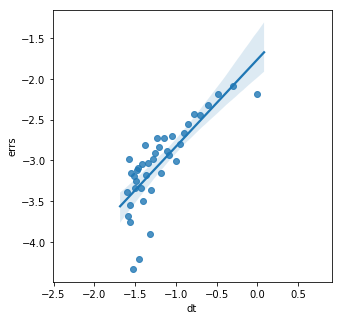

In [443]:
plt.figure(figsize=(5,5))
sns.regplot(x=np.log10(df['dt']), y=np.log10(df['errs']))
plt.axis('equal')